#### Group 9 - Advanced Simulation
## Assignment 3

***

In [126]:
#import data manipulation and visualization libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# 1. Data preparation

We import the data and prepare it to display the results of the simulation.

In [127]:
#Read first scenario for data check
results_df=pd.read_csv('../model/output/scenario_'+str(0)+'.csv')
results_df.tail(2)

,name,length,condition,betweenness,total_delay_time,vehicle_count
1022,LRP199,7.60,A,0.003820,0,27957
1023,LRP200,17.15,A,0.001912,0,27956


In [128]:
#We recategorize the bridge lengths in accordance to the assignment definition

bridge_cats={">200 m":range(200,10000),"50 - 200 m":range(50,200),"10-50 m":range(10,50),"<10 m":range(0,10)}
results_df["length_cat"]=""
for n in results_df.index:
    
    for k in bridge_cats:
        
        if (int(results_df["length"][n]) in bridge_cats[k]):
            results_df["length_cat"][n]=k 
            break
        continue
results_df.to_csv('lenghtcat_bridges.csv', index=False)
results_df.head(3)

C:\Users\ariel\AppData\Local\Temp\ipykernel_13036\1782845514.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df["length_cat"][n]=k


,name,length,condition,betweenness,total_delay_time,vehicle_count,length_cat
0,LRP001,11.3,A,0.001912,0,1434,10-50 m
1,LRP004,6.6,A,0.000000,0,1435,<10 m
2,KANCHPUR PC GIRDER BRIDGE,397.0,C,0.000956,0,1436,>200 m


In [129]:
#We check how our scenario csv are organized
scenario_df=pd.read_csv('../model/output/scenario_'+str(2)+'.csv')
scenario_df.head(2)

,name,length,condition,betweenness,total_delay_time,vehicle_count
0,LRP001,11.3,A,0.001912,0.0,1406
1,LRP004,6.6,A,0.000000,0.0,1406


## Creating a dataframe with the results of all scenarios

In [130]:
#We create a df with the values of all of our scenarios
results_df = results_df.drop(columns="total_delay_time")
results_df = results_df.rename(columns={"vehicle_count":"vehicle_count_s0"})


#loop through all scenarios
for n in np.arange(1,5):
    #read all scenarios
    scenario_df = pd.read_csv('../model/output/scenario_'+str(n)+'.csv')
    scenario_df = scenario_df.drop(columns=["name","length","condition","betweenness","vehicle_count"])
    scenario_df = scenario_df.rename(columns={"total_delay_time":"S"+str(n)})
    #tidy driving time values
    scenario_df["S"+str(n)]=round(scenario_df["S"+str(n)],0)

    results_df=results_df.join(scenario_df)

results_df.head()

,name,length,condition,betweenness,vehicle_count_s0,length_cat,S1,S2,S3,S4
0,LRP001,11.300000,A,0.001912,1434,10-50 m,0.0,0.0,0.0,3059.0
1,LRP004,6.600000,A,0.000000,1435,<10 m,0.0,0.0,0.0,1755.0
2,KANCHPUR PC GIRDER BRIDGE,397.000000,C,0.000956,1436,>200 m,0.0,15039.0,21438.0,34189.0
3,KATCHPUR BOX CULVERT,6.866667,B,0.198254,62200,<10 m,0.0,0.0,60773.0,92952.0
4,NAYABARI KASPUR BOX CULVERT,9.450000,A,0.198054,62197,<10 m,0.0,0.0,0.0,72549.0


### Tidyin up the data

In [131]:
results_df.head()

,name,length,condition,betweenness,vehicle_count_s0,length_cat,S1,S2,S3,S4
0,LRP001,11.300000,A,0.001912,1434,10-50 m,0.0,0.0,0.0,3059.0
1,LRP004,6.600000,A,0.000000,1435,<10 m,0.0,0.0,0.0,1755.0
2,KANCHPUR PC GIRDER BRIDGE,397.000000,C,0.000956,1436,>200 m,0.0,15039.0,21438.0,34189.0
3,KATCHPUR BOX CULVERT,6.866667,B,0.198254,62200,<10 m,0.0,0.0,60773.0,92952.0
4,NAYABARI KASPUR BOX CULVERT,9.450000,A,0.198054,62197,<10 m,0.0,0.0,0.0,72549.0


In [132]:
value_vars=["S1",'S2','S3','S4']
id_vars=["name","length","condition","betweenness","vehicle_count_s0"]
results_df_tidy=pd.melt(results_df,id_vars=id_vars,value_vars=value_vars,var_name="Scenario",value_name="delay_time")

results_df_tidy.tail()


,name,length,condition,betweenness,vehicle_count_s0,Scenario,delay_time
4091,Moddho Badorpur Bridge,12.900000,A,0.009524,27955,S4,62924.0
4092,LRP197,5.100000,A,0.007626,27961,S4,28222.0
4093,LRP198,29.823333,A,0.005725,27958,S4,63978.0
4094,LRP199,7.600000,A,0.003820,27957,S4,26934.0
4095,LRP200,17.150000,A,0.001912,27956,S4,56859.0


# 2. Assessment of bridge conditions and distribution

<Axes: xlabel='betweenness', ylabel='vehicle_count_s0'>

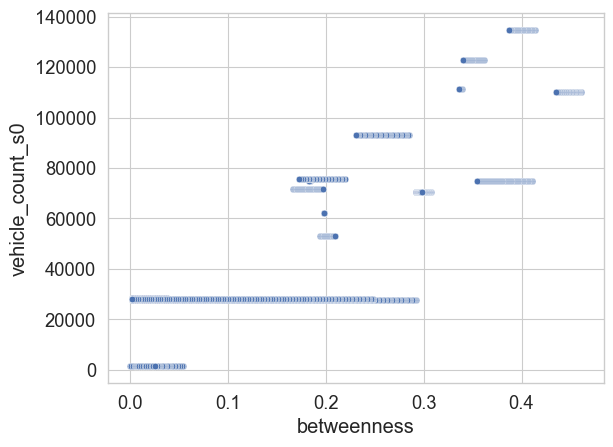

In [133]:
sns.scatterplot(results_df,x="betweenness",y="vehicle_count_s0")

# 2. Delay times assessment

In [134]:
results_df_tidy.head(3)

,name,length,condition,betweenness,vehicle_count_s0,Scenario,delay_time
0,LRP001,11.3,A,0.001912,1434,S1,0.0
1,LRP004,6.6,A,0.000000,1435,S1,0.0
2,KANCHPUR PC GIRDER BRIDGE,397.0,C,0.000956,1436,S1,0.0


<Axes: xlabel='delay_time', ylabel='Density'>

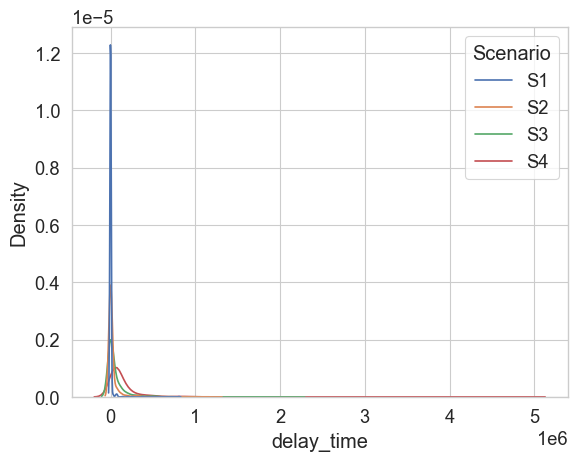

In [135]:
sns.kdeplot(results_df_tidy,x="delay_time",hue="Scenario")

<Axes: xlabel='delay_time', ylabel='Density'>

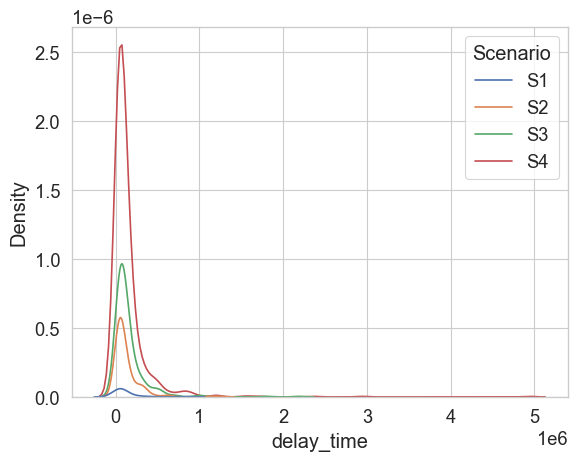

In [136]:
# as we can see, most of the values are 0 preventing us to see the results
#let's fix that

results_df_tidy_notnull = results_df_tidy[results_df_tidy["delay_time"]!=0]
sns.kdeplot(results_df_tidy_notnull,x="delay_time",hue="Scenario")

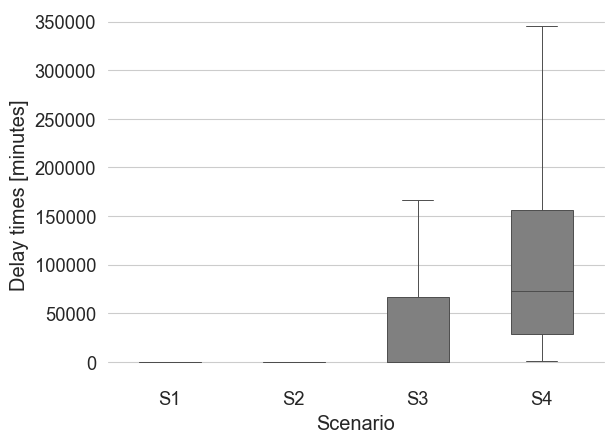

In [137]:
#Boxplot without outliers
#Set up style
sns.set(style='whitegrid', rc={"grid.linewidth": 0.1})
sns.set_context("paper", font_scale=1.5)                                                  
color = sns.color_palette("Set2", 6)

# Create a box plot for my data                                                      
splot = sns.boxplot(data=results_df_tidy, x="Scenario", y="delay_time", color="grey",                              
        width=0.5, linewidth = 0.7, showfliers = False)

# Labels and clean up on the plot                                                                                                                                                                                                                                                                                              
splot.set_ylabel('Delay times [minutes]')     
splot.set_xlabel("Scenario")                                                             

# Remove the top and right line in graph                                                                   
splot.yaxis.grid(True, clip_on=False)                                              
sns.despine(left=True, bottom=True)       
#Save figure
#plt.savefig('../report/figures/boxplot.png', dpi=300, bbox_inches='tight')      

In [140]:
results_df_tidy.head()

,name,length,condition,betweenness,vehicle_count_s0,Scenario,delay_time
0,LRP001,11.300000,A,0.001912,1434,S1,0.0
1,LRP004,6.600000,A,0.000000,1435,S1,0.0
2,KANCHPUR PC GIRDER BRIDGE,397.000000,C,0.000956,1436,S1,0.0
3,KATCHPUR BOX CULVERT,6.866667,B,0.198254,62200,S1,0.0
4,NAYABARI KASPUR BOX CULVERT,9.450000,A,0.198054,62197,S1,0.0


In [145]:
results_df_tidy.nlargest(10,"delay_time").head(50)

,name,length,condition,betweenness,vehicle_count_s0,Scenario,delay_time
3749,Sherpur Bridge,282.350,D,0.219303,75518,S4,4934776.0
3700,Shaistaganj Bridge,217.250,C,0.339872,122897,S4,2949994.0
3750,Shadipur Bridge,159.850,D,0.217867,75521,S4,2356663.0
2725,Sherpur Bridge,282.350,D,0.219303,75518,S3,2184891.0
2676,Shaistaganj Bridge,217.250,C,0.339872,122897,S3,1800738.0
3653,Titas Bridge,114.375,C,0.407772,134688,S4,1712493.0
3666,Madhab pur Bridge,68.090,C,0.396765,134689,S4,1598508.0
3298,Mathamuhuri Bridge,294.150,D,0.191391,27668,S4,1521129.0
1701,Sherpur Bridge,282.350,D,0.219303,75518,S2,1251239.0
3100,Daud Kandi Bridge,1408.800,C,0.194810,53112,S4,1201811.0


In [152]:
top10=results_df_tidy.groupby('Scenario', as_index=False).apply(lambda x: x.nlargest(10, 'delay_time')).head(40)

name       length condition  betweenness  \
0 677       Sherpur Bridge   282.350000         D     0.219303   
  678      Shadipur Bridge   159.850000         D     0.217867   
  226   Mathamuhuri Bridge   294.150000         D     0.191391   
  141      Modonhat Bridge    24.320000         D     0.365054   
  916         Kumar Bridge   109.600000         D     0.185347   
  940               LRP095    36.760000         D     0.147849   
  280             MORICHIA    20.600000         D     0.104847   
  954               LRP110    15.925000         D     0.125001   
  496      RANIRHAT BRIDGE    33.666667         D     0.028296   
  924               LRP078    12.100000         D     0.173082   
1 1701      Sherpur Bridge   282.350000         D     0.219303   
  1652  Shaistaganj Bridge   217.250000         C     0.339872   
  1605        Titas Bridge   114.375000         C     0.407772   
  1618   Madhab pur Bridge    68.090000         C     0.396765   
  1702     Shadipur Bridge   159.850000         D     0.217867   
  1040       MEGHNA BRIDGE   900.000000         C     0.197611   
  1052   Daud Kandi Bridge  1408.800000         C     0.194810   
  1250  Mathamuhuri Bridge   294.150000         D     0.191391   
  1621     Mirnagar Bridge    36.700000         C     0.394138   
  1598   Kuttu para Bridge    22.960000         C     0.413442   
2 2725      Sherpur Bridge   282.350000         D     0.219303   
  2676  Shaistaganj Bridge   217.250000         C     0.339872   
  2726     Shadipur Bridge   159.850000         D     0.217867   
  2629        Titas Bridge   114.375000         C     0.407772   
  2642   Madhab pur Bridge    68.090000         C     0.396765   
  2064       MEGHNA BRIDGE   900.000000         C     0.197611   
  2076   Daud Kandi Bridge  1408.800000         C     0.194810   
  2274  Mathamuhuri Bridge   294.150000         D     0.191391   
  2645     Mirnagar Bridge    36.700000         C     0.394138   
  2622   Kuttu para Bridge    22.960000         C     0.413442   
3 3749      Sherpur Bridge   282.350000         D     0.219303   
  3700  Shaistaganj Bridge   217.250000         C     0.339872   
  3750     Shadipur Bridge   159.850000         D     0.217867   
  3653        Titas Bridge   114.375000         C     0.407772   
  3666   Madhab pur Bridge    68.090000         C     0.396765   
  3298  Mathamuhuri Bridge   294.150000         D     0.191391   
  3100   Daud Kandi Bridge  1408.800000         C     0.194810   
  3213     Modonhat Bridge    24.320000         D     0.365054   
  3088       MEGHNA BRIDGE   900.000000         C     0.197611   
  3669     Mirnagar Bridge    36.700000         C     0.394138   

        vehicle_count_s0 Scenario  delay_time  
0 677              75518       S1    805687.0  
  678              75521       S1    381088.0  
  226              27668       S1    254381.0  
  141              74810       S1    200164.0  
  916              27955       S1    139787.0  
  940              27957       S1     79373.0  
  280              27684       S1     78849.0  
  954              27967       S1     78071.0  
  496              27958       S1     77737.0  
  924              27957       S1     74091.0  
1 1701             75518       S2   1251239.0  
  1652            122897       S2   1141409.0  
  1605            134688       S2    658583.0  
  1618            134689       S2    611499.0  
  1702             75521       S2    603400.0  
  1040             53113       S2    466962.0  
  1052             53112       S2    460845.0  
  1250             27668       S2    401486.0  
  1621            134678       S2    385776.0  
  1598            134680       S2    362604.0  
2 2725             75518       S3   2184891.0  
  2676            122897       S3   1800738.0  
  2726             75521       S3   1040501.0  
  2629            134688       S3   1022857.0  
  2642            134689       S3    952719.0  
  2064             53113       S3    709444.0  
  2076             

In [146]:
top10_results = results_df_tidy.groupby('Scenario').delay_time.nlargest(10)
top10_results.tail(20)

Scenario      
S3        2725    2184891.0
          2676    1800738.0
          2726    1040501.0
          2629    1022857.0
          2642     952719.0
          2064     709444.0
          2076     708898.0
          2274     674324.0
          2645     599748.0
          2622     564044.0
S4        3749    4934776.0
          3700    2949994.0
          3750    2356663.0
          3653    1712493.0
          3666    1598508.0
          3298    1521129.0
          3100    1201811.0
          3213    1200555.0
          3088    1200222.0
          3669    1002196.0
Name: delay_time, dtype: float64

## Driving times assessment

We display the driving time in two boxplots, one with outliers and one without. The boxplots are shown below.

In [139]:
sns.boxplot(data=results_df_tidy, x="Scenario", y="Driving time",color="gray")

ValueError: Could not interpret input 'Driving time'

## Stochasticity assessment